## Title: M7 Heuristics Assignment
## Author: Leo Genders
## Date: 18 August 2024

In [1]:
# importing all the needed libraries for the assignment to be more efficient
from IPython import display

## 1) Model Formulation - Harlem Globetrotters

See Insights video 7.1. Be sure to include the subtour elimination constraints.

**Sets** \
$N$: set of nodes (cities {New York NY, Los Angeles CA, ..., Austin, TX}\
$A$: set of arcs (routes between cities)\
$S$: subset of nodes N to account for the tour leaving $S$ at least once

**Parameters** \
$c_{i,j}$: cost (distance) for traveling on arc ($i$,$j$)

**Decision Variables** \
$x_{i,j}$: = 1 if arc ($i$,$j$) is in the tour, = 0 otherwise (if not)

**Objective Function and Constraints** \
The optimization model is formulated as


\begin{equation*}
\begin{matrix}
\underset{x}{\min} & \underset{(i,j) \in A}{\sum}c_{i,j}x_{i,j} &\\
\textrm{s.t.} & \underset{i:(i,j) \in A}{\sum}x_{i,j} = \underset{k:(j,k) \in A}{\sum}x_{j,k}, & \forall j \in N & & \\
& x_{i,j} \in \{0,1\} ,&  \forall (i,j) \in A & \\
& \underset{j:(0,j) \in A}{\sum}x_{i,j} = 1 & \\
& \underset{i\in S}{\sum}\underset{j\notin S}{\sum} x_{i,j}  \geq 1, & \forall S \subset N\\
\end{matrix}
\end{equation*}

**Citation for determining subset script in LATEX notation**. (2024). *Mathematical fonts*. Overleaf. Retrieved August 17, 2024 from https://www.overleaf.com/learn/latex/Mathematical_fonts#Other_mathematical_fonts 

**How many subtour elimination constraints are there?**
There are $2^n$ - 2 constraints in a problem with $n$ nodes.\
There are 11 nodes in this problem.\
There are 2^11 - 2 nodes or 2048 - 2 constraints.\
There are **2046** subtour elimination constraints.

## 2) Linear Programming Relaxation - Harlem Globetrotters
* Drop subtour elimination constraints
* Self-loops are eliminated from the set of arcs

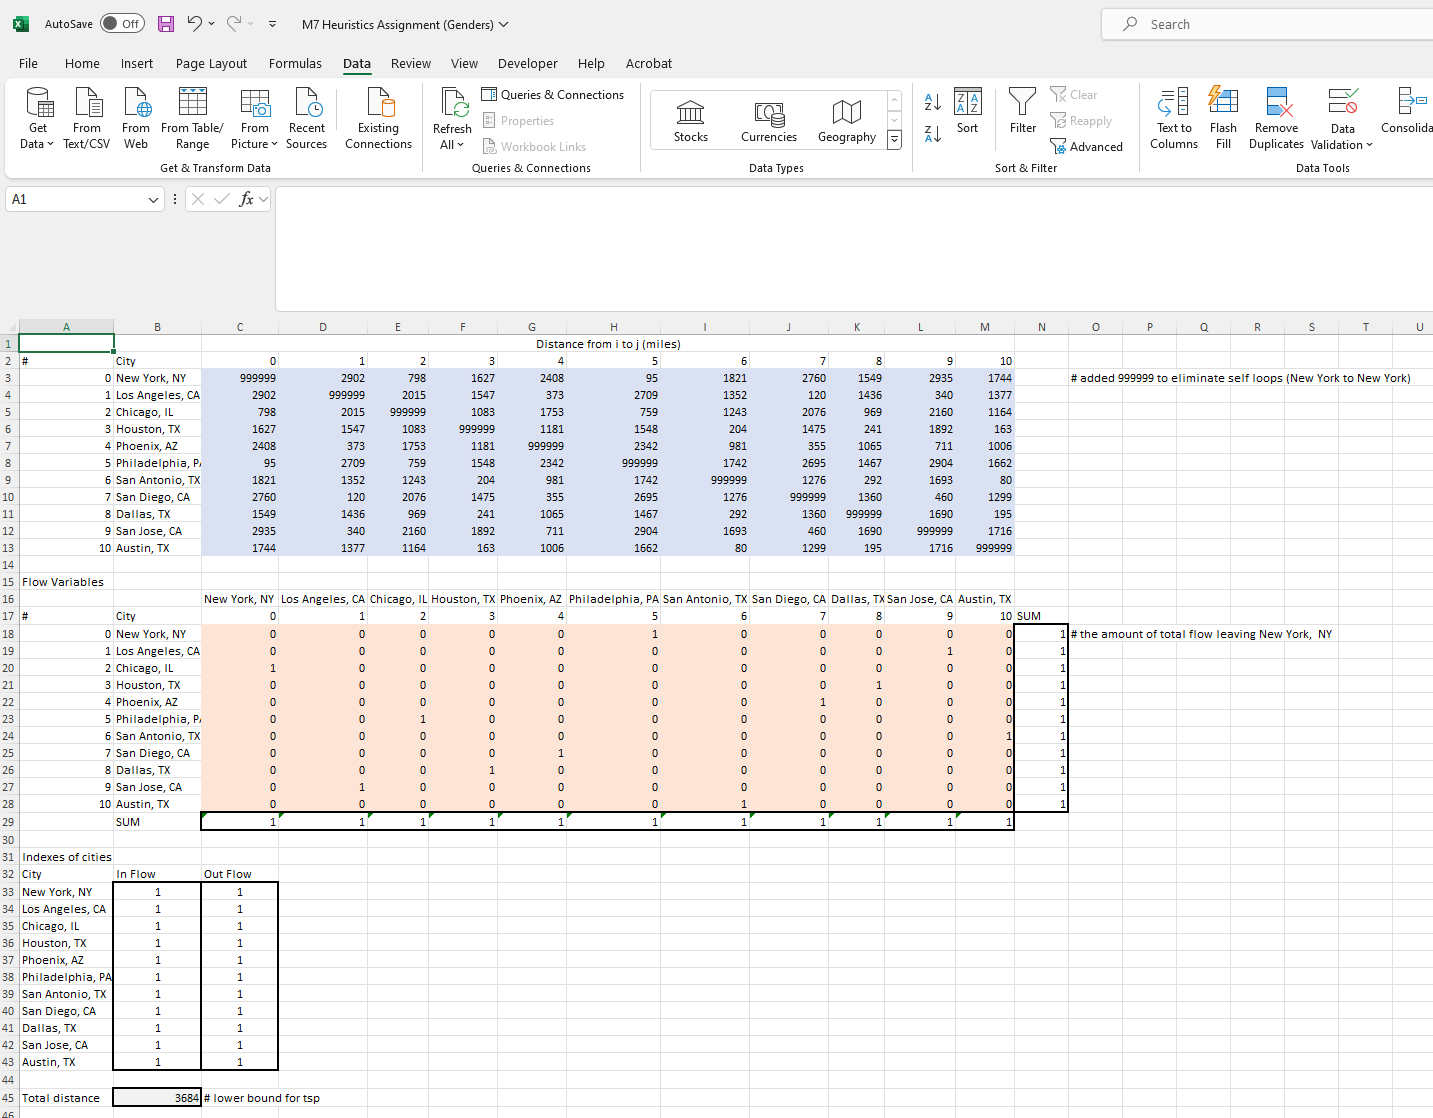

In [2]:
display.Image("LP_relaxation.png")

**Interpretation**: The total distance in miles for this route is 3,684 miles. The solution has the Harlem Globe Trotters starting in New York, NY then to Philadephia, PA then to Chicago, IL then back to New York, NY because there are four disconnecte loops. One of the disconnected loops is from New York, NY to Philadephia, PA to Chicago, IL and back to New York, NY. Another disconnected loop goes between Austin, TX and San Antonio, TX. Another disconnected loop goes between San Jose, CA and Los Angeles, CA. Another disconnected loop goes between San Diego, CA and Phoenix, AZ. Disconnected loops indicate that the Harlem Globetrotters would not follow the route for the Linear Programming Relaxation problem, as they would be stuck within one of these four loops indefinitely.

## 3) Heuristic Model (Excel) - Harlem Globetrotters

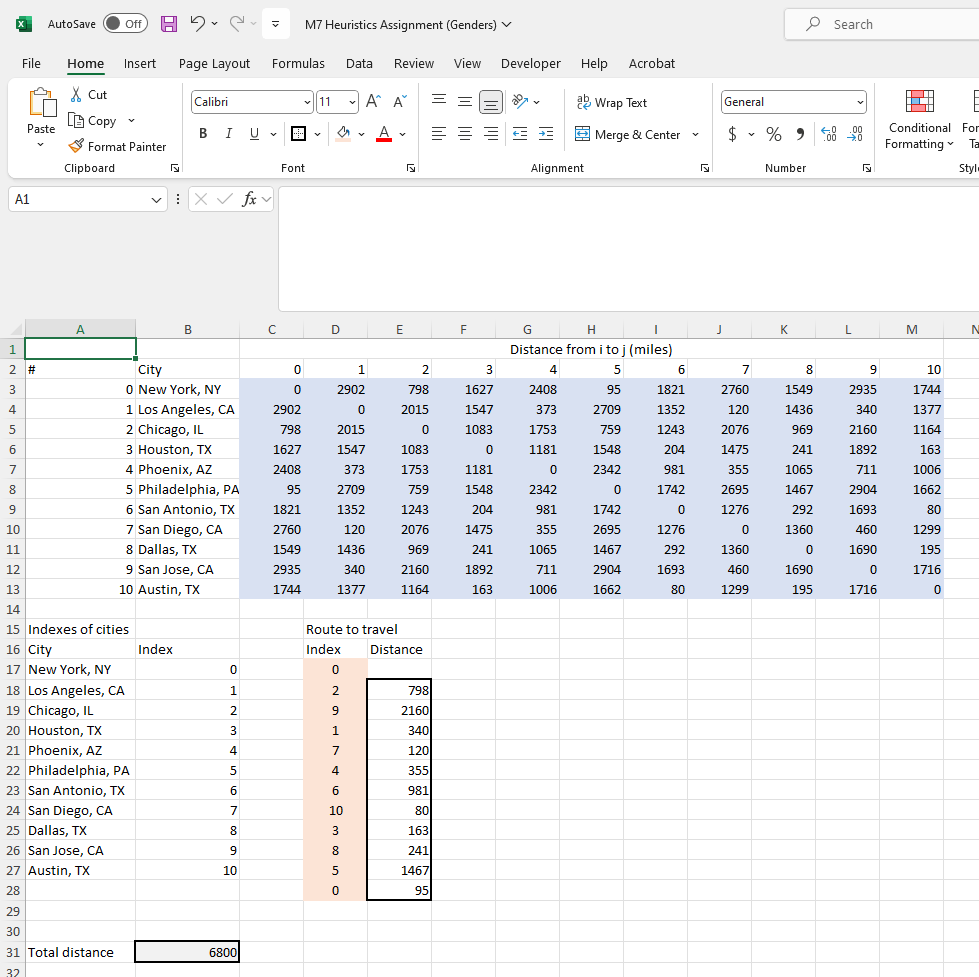

In [3]:
display.Image("heuristic_model.png")

**What route should the Globetrotters take and how far will they travel?**
According to the heursitc model, the Globetrotters should travel from New York, NY to Chicago, IL to San Jose, CA to Los Angeles, CA to San Diego, CA to Phoenix, AZ to San Antonio, TX to Austin, TX to Houston, TX to Dallas, TX to Philadelphia, PA  to New York, NY.

*The Globetrotters will travel **6800** miles using the excel model.*

## 4) Solution Mapping (Excel)

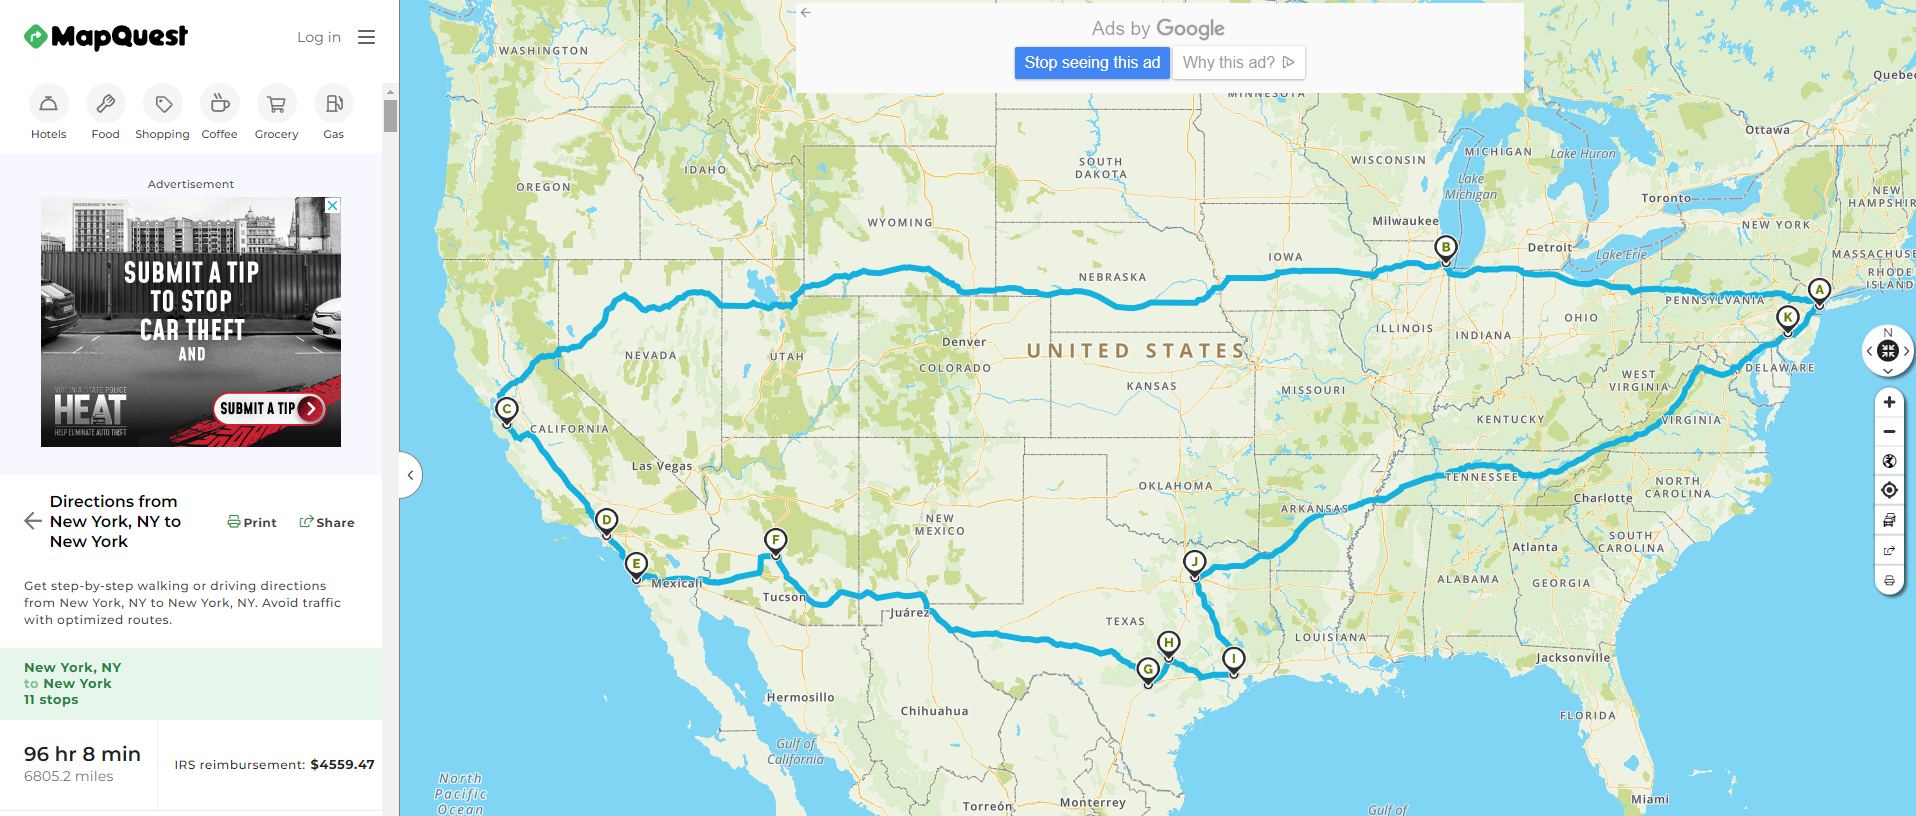

In [4]:
display.Image("mapquest_excel_route.png")

## 5) Heuristic Model (Greedy) - Harlem Globetrotters

## Model Formulation (Greedy) - Harlem Globetrotters

In [5]:
# Node dictionary with adjacent nodes and distances
A = {
    'New York, NY': [['New York, NY', 0],['Los Angeles, CA', 2902],['Chicago, IL', 798], ['Houston, TX', 1627],['Phoenix, AZ', 2408],['Philadelphia, PA', 95],['San Antonio, TX', 1821],['San Diego, CA', 2760], ['Dallas, TX', 1549],['San Jose, CA', 2935], ['Austin, TX', 1744]],
    'Los Angeles, CA': [['New York, NY', 2902],['Los Angeles, CA', 0],['Chicago, IL', 2015], ['Houston, TX', 1547],['Phoenix, AZ', 373],['Philadelphia, PA', 2709],['San Antonio, TX', 1352],['San Diego, CA', 120], ['Dallas, TX', 1436],['San Jose, CA', 340], ['Austin, TX', 1377]],
    'Chicago, IL': [['New York, NY', 798],['Los Angeles, CA', 2015],['Chicago, IL', 0], ['Houston, TX', 1083],['Phoenix, AZ', 1753],['Philadelphia, PA', 759],['San Antonio, TX', 1243],['San Diego, CA', 2076], ['Dallas, TX', 969],['San Jose, CA', 2160], ['Austin, TX', 1164]],
    'Houston, TX': [['New York, NY', 1627],['Los Angeles, CA', 1547],['Chicago, IL', 1083], ['Houston, TX', 0],['Phoenix, AZ', 1181],['Philadelphia, PA', 1548],['San Antonio, TX', 204],['San Diego, CA', 1475], ['Dallas, TX', 241],['San Jose, CA', 1892], ['Austin, TX', 163]],
    'Phoenix, AZ': [['New York, NY', 2408],['Los Angeles, CA', 373],['Chicago, IL', 1753], ['Houston, TX', 1181],['Phoenix, AZ', 0],['Philadelphia, PA', 2342],['San Antonio, TX', 981],['San Diego, CA', 355], ['Dallas, TX', 1065],['San Jose, CA', 711], ['Austin, TX', 1006]],
    'Philadelphia, PA': [['New York, NY', 95],['Los Angeles, CA', 2709],['Chicago, IL', 759], ['Houston, TX', 1548],['Phoenix, AZ', 2342],['Philadelphia, PA', 0],['San Antonio, TX', 1742],['San Diego, CA', 2695], ['Dallas, TX', 1467],['San Jose, CA', 2904], ['Austin, TX', 1662]],
    'San Antonio, TX': [['New York, NY', 1821],['Los Angeles, CA', 1352],['Chicago, IL', 1243], ['Houston, TX', 204],['Phoenix, AZ', 981],['Philadelphia, PA', 1742],['San Antonio, TX', 0],['San Diego, CA', 1276], ['Dallas, TX', 292],['San Jose, CA', 1693], ['Austin, TX', 80]],
    'San Diego, CA': [['New York, NY', 2760],['Los Angeles, CA', 120],['Chicago, IL', 2076], ['Houston, TX', 1475],['Phoenix, AZ', 355],['Philadelphia, PA', 2695],['San Antonio, TX', 1276],['San Diego, CA', 0], ['Dallas, TX', 1360],['San Jose, CA', 460], ['Austin, TX', 1299]],
    'Dallas, TX': [['New York, NY', 1549],['Los Angeles, CA', 1436],['Chicago, IL', 969], ['Houston, TX', 241],['Phoenix, AZ', 1065],['Philadelphia, PA', 1467],['San Antonio, TX', 292],['San Diego, CA', 1360], ['Dallas, TX', 0],['San Jose, CA', 1690], ['Austin, TX', 195]],
    'San Jose, CA': [['New York, NY', 2935],['Los Angeles, CA', 340],['Chicago, IL', 2160], ['Houston, TX', 1892],['Phoenix, AZ', 711],['Philadelphia, PA', 2904],['San Antonio, TX', 1693],['San Diego, CA', 460], ['Dallas, TX', 1690],['San Jose, CA', 0], ['Austin, TX', 1716]],
    'Austin, TX': [['New York, NY', 1744],['Los Angeles, CA', 1377],['Chicago, IL', 1164], ['Houston, TX', 163],['Phoenix, AZ', 1006],['Philadelphia, PA', 1662],['San Antonio, TX', 80],['San Diego, CA', 1299], ['Dallas, TX', 195],['San Jose, CA', 1716], ['Austin, TX', 0]],
}

# Initialize parameters
## source
s = 'New York, NY' # <-- Insert the name of the starting city here.
## large number, larger than the sum all distances
M = 999999 # <-- Insert a large number here: something > sum of all acr distances
## path
x = [s]
## unvisited nodes
u = ['Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ', 'Philadelphia, PA', 'San Antonio, TX', 'San Diego, CA', 'Dallas, TX', 'San Jose, CA', 'Austin, TX'] # <-- Insert the list of unvisited city names here
## total distance
total_dist = 0


# loop until path reaches destination
while len(u) > 0:
    # reset closest distance to a large number
    dist = M
    # loop over nodes that are adjacent to the last node in the path
    for j in A[x[-1]]:
        # need to only consider unvisited nodes
        if (j[0] in u):
            # choose the node that is closest (shortest distance)
            if j[1] < dist:
                # save its label to variable k
                k = j[0]
                # also save its distance
                dist = j[1]
    # add closest node to the path
    x.append(k)
    # ...and remove it from the unvisited nodes list
    u.remove(k)
    # increment total distance
    total_dist = total_dist + dist

# add distance from the last node to the source
total_dist = total_dist + A[x[-1]][0][1]
# add source to the end of the path
x.append(s)

# print solution
print("The path is: %s" % x)
print("The total distance is %s." % total_dist)

The path is: ['New York, NY', 'Philadelphia, PA', 'Chicago, IL', 'Dallas, TX', 'Austin, TX', 'San Antonio, TX', 'Houston, TX', 'Phoenix, AZ', 'San Diego, CA', 'Los Angeles, CA', 'San Jose, CA', 'New York, NY']
The total distance is 7233.


According to the Greedy heuristic, the Harlem Globetrotters should travel from New York, NY to Philadelphia, PA to CHicago, IL to Dallas, TX to Austin, TX to San Antonio, TX to Houston, TX to Phoenix, AX to San Diego, CA to Los Angeles, CA to San Jose, CA to New York, NY. 

*The Globetrotters will travel **7233** miles using the greedy heuristics model.*

## 6) Solution Mapping (Greddy) - Harlem Globetrotters

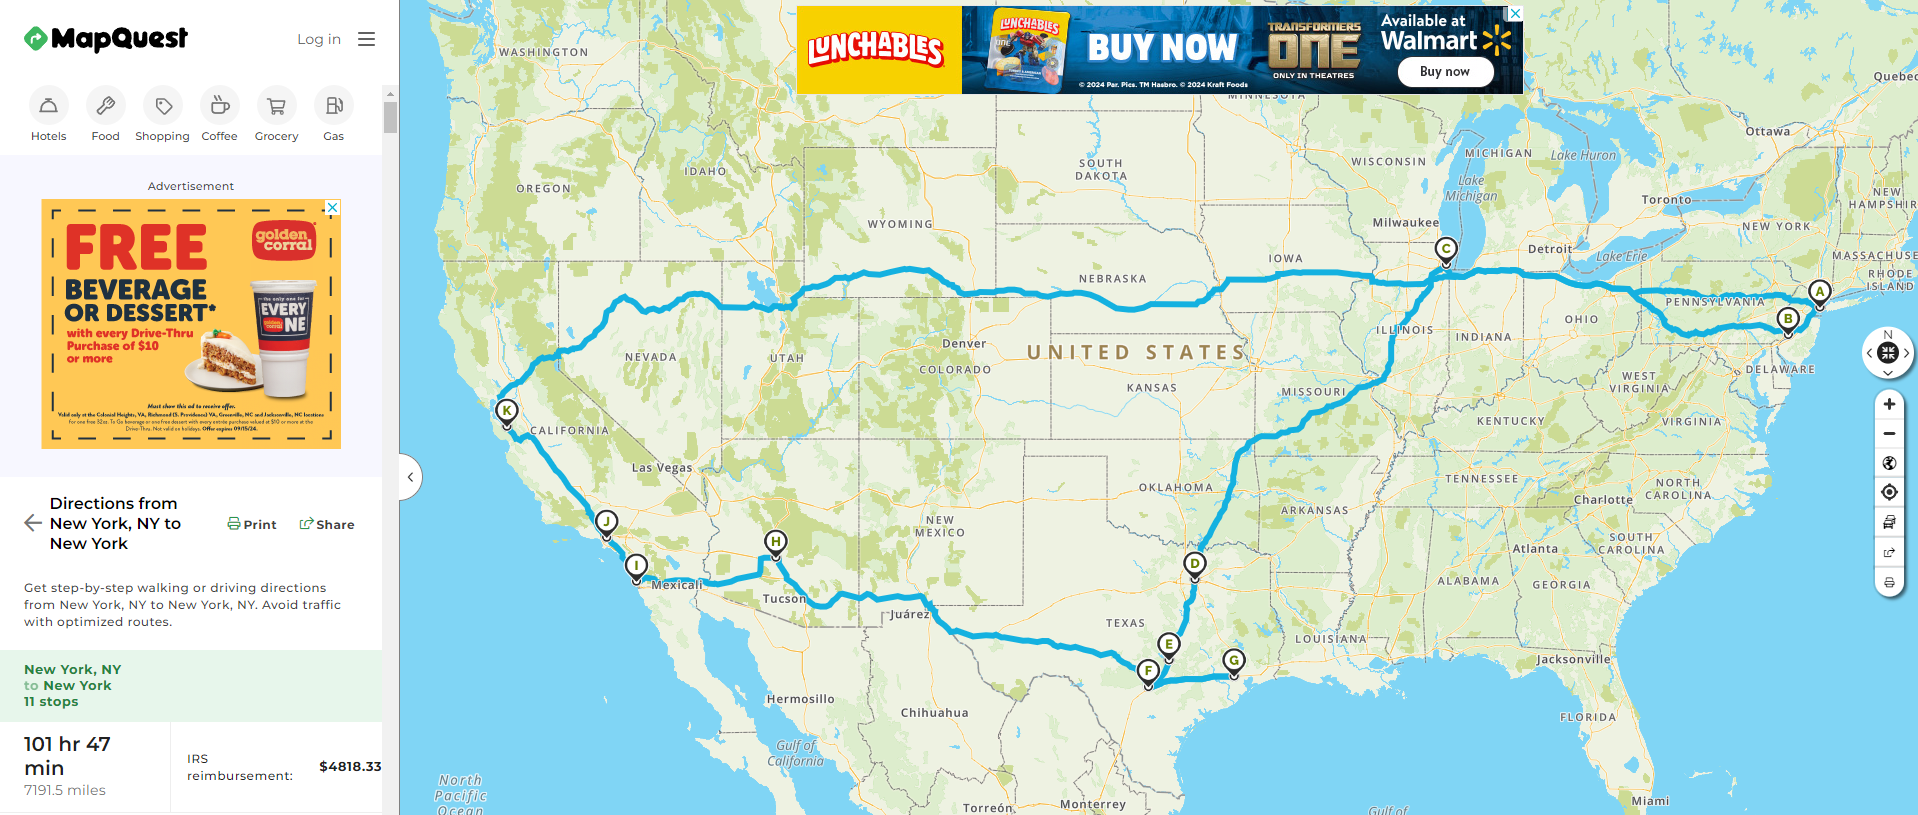

In [6]:
display.Image("mapquest_greedy_route.png")

## 7) Analysis
**Do you think either the evolutionary solver or your greedy algorithm was able to produce the true
optimal solution to this problem? Explain using the models, solutions, and diagrams you’ve produced.**

Becuase heuristic algorithms are not guaranteed to provide the true optimal solution to a given problem, I do not expect the greedy algorithim produce the true optimal solution to the Harlem Globetrotter problem. However, the route from Mapquest indicates the total travel distance is 7191.5 miles for the greedy path which is less than 40 miles different than the greedy algorithim total distance. I consider this to be close for the problem we are working with, though this may not be the case in other scenarios.

Mapquest has a feature that states "Re-order stops for the most optimized route" and after selecting this feature, the route which Mapquest produces is slightly different:

* New York, NY to Chicago, IL
* Chicago, IL to San Jose, CA
* San Jose, CA to Los Angeles, CA
* Los Angeles, CA to San Diego, CA
* San Diego, CA to Phoenix, AZ
* Phoenix, AZ to San Antonio, TX
* San Antonio, TX to Austin, TX
* Austin TX to Houston, TX
* Houston, TX to Dallas, TX
* Dallas, TX to Philadelphia, PA
* Philadelphia, PA to New York, NY

**Total distance using Mapquest route optimization feature: 6800.8 miles**

Whether the Mapquest optimization solution is truly the optimal solution, it was found in nearly the same amount of time as the  greedy heuristic and also reduced 390.7 miles (7191.5 - 6800.8) from my greedy model. This is still an improvement to my route and would reduce the cost required for the Globetrotters to complete thier tour.

At an initial glance to the Linear Programming Relaxation total distance of 3684, it may be considered a result that is far greater than even Maqpquest. However, this is untrue because of the four disconnected loops which do not satisfy the requirements for the Globetrotters to reach each city.

Mapquest Optimization feature screenshot

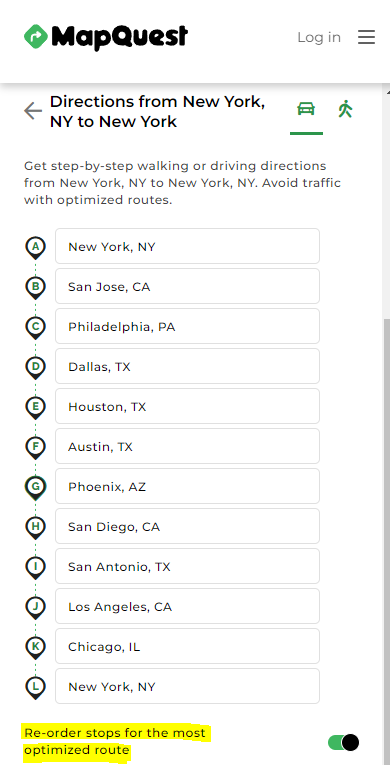

In [7]:
display.Image('mapquest_optimization_feature.png')

Mapquest optimization route

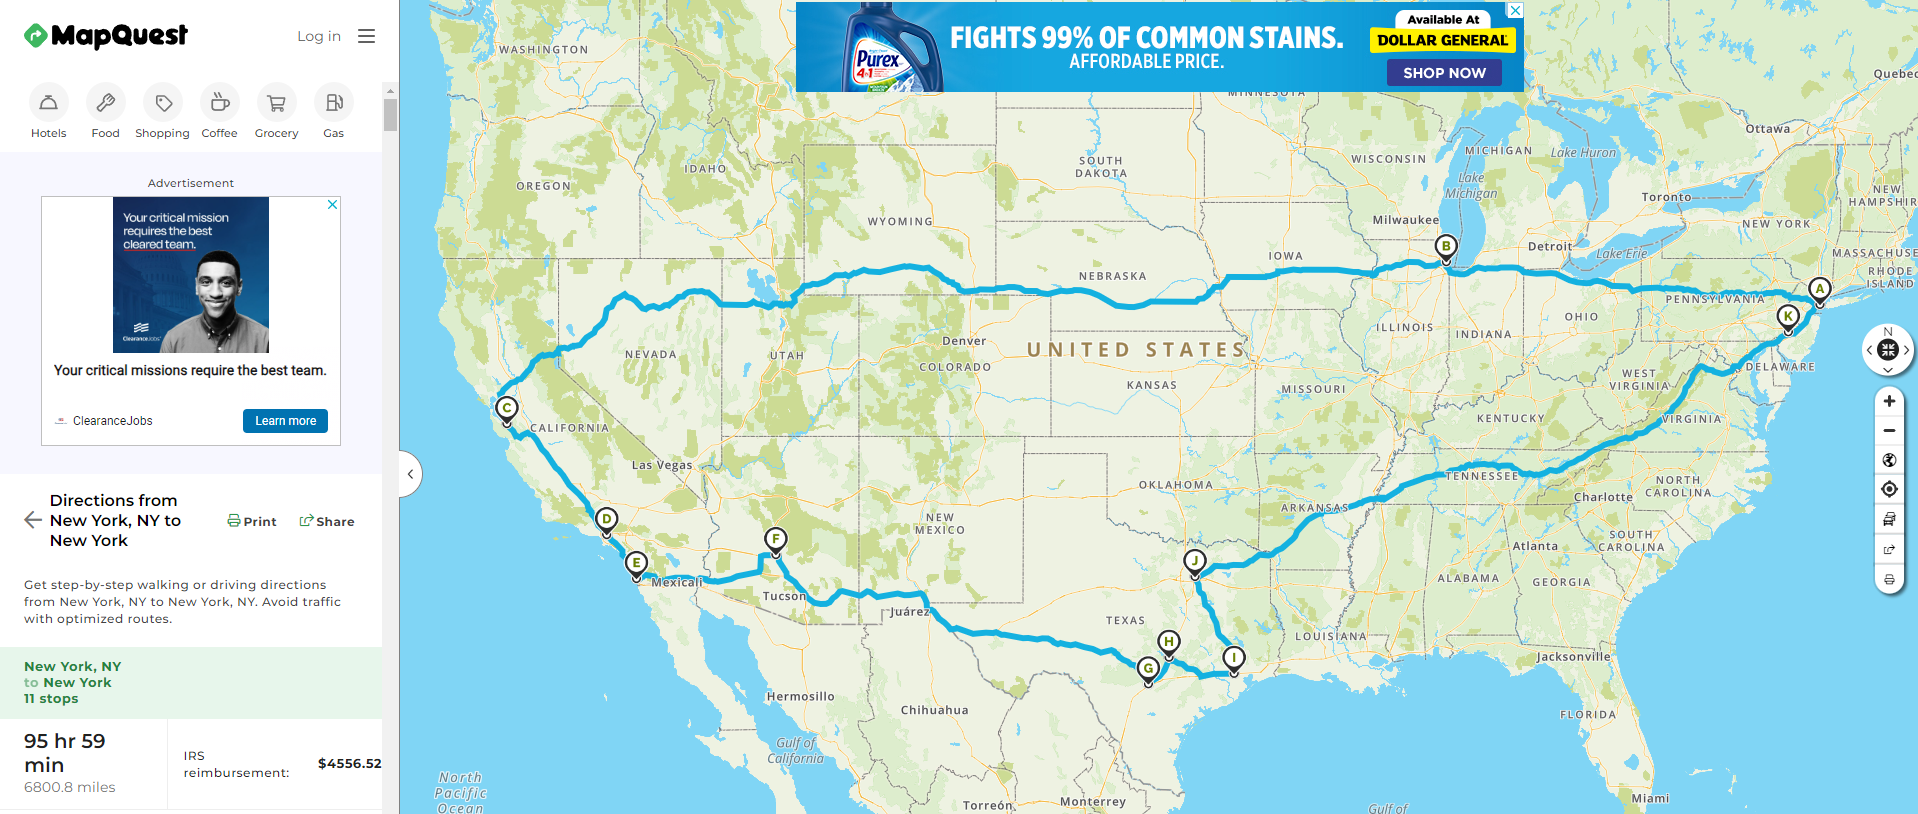

In [8]:
display.Image('mapquest_optimization_route.png')